# **라이브러리 로드**

In [ ]:
from math import sqrt
import pandas as pd
import numpy as np


# 데이터 전처리 패키지
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 모델 패키지
from sklearn.ensemble import RandomForestClassifier
from deap import base, creator, tools, algorithms
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout

# 모델 평가 패키지
from sklearn.metrics import accuracy_score

# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

# **실습1 : 차원 축소 - 변수 선택법(유전 알고리즘)**

breast-cancer.csv
- 유방 종양의 30개 물리적 특성 관련 지표
- 목표 변수 : Diagnosis(악성M/양성B)

### **데이터 로드**

In [ ]:
# 데이터 전처리 함수

    # 범주형 변수 컬럼 확인 및 라벨인코딩


In [ ]:
# data 로드


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### **데이터 전처리**

In [ ]:
# 학습에 불필요한 독립 변수 제거 'id', 'diagnosis', 'Unnamed: 32'

# 타겟 변수 설정 'diagnosis'

# 데이터 분할



In [ ]:
# 데이터 정보 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

## 3. 유전 알고리즘 설정

In [ ]:
# 유전 알고리즘 설정
# Fitness 함수 정의 (정확도를 최대화하는 문제)



/home/hyo/anaconda3/envs/day131/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hyo/anaconda3/envs/day131/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
# 유전자의 표현 (특성 선택 여부를 0 또는 1로 표시)


# 개체 생성 (특성의 수만큼 0 또는 1로 이루어진 리스트)


# 개체군 생성



In [ ]:
# 평가 함수 정의



# 교배, 변이, 선택 연산 정의



In [ ]:
# 알고리즘 적용 전 초기 모델 성능 확인


Initial accuracy (all features): 0.9708


In [ ]:
# 유전 알고리즘으로 변수 선택 수행


# 통계 정보 출력 설정

# 최적의 해 찾기


gen	nevals	avg     	min     	max     
0  	50    	0.965263	0.935673	0.982456
1  	31    	0.971813	0.953216	0.982456
2  	32    	0.975322	0.959064	0.994152
3  	27    	0.980351	0.953216	0.994152
4  	34    	0.982456	0.964912	0.994152
5  	32    	0.984795	0.97076 	0.994152
6  	37    	0.986082	0.97076 	0.994152
7  	24    	0.98924 	0.976608	0.994152
8  	30    	0.990526	0.97076 	0.994152
9  	34    	0.989357	0.976608	0.994152
10 	21    	0.991228	0.97076 	0.994152
11 	23    	0.991111	0.959064	0.994152
12 	34    	0.990292	0.959064	0.994152
13 	34    	0.990175	0.964912	0.994152
14 	24    	0.991813	0.959064	0.994152
15 	23    	0.993099	0.976608	0.994152
16 	35    	0.990526	0.97076 	0.994152
17 	26    	0.990877	0.97076 	0.994152
18 	30    	0.992164	0.97076 	0.994152
19 	29    	0.992398	0.97076 	0.994152
20 	26    	0.992865	0.97076 	0.994152
Best individual: [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
Selected features: [0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 

In [ ]:
# 선택된 특성을 사용한 모델 정확도 계산


Final accuracy (selected features): 0.9942


In [ ]:
# 개선 정확도 산출


Accuracy improvement: 0.0234


***

# **실습2: 차원 축소 - 변수 추출법(PCA)**

mnist dataset
- 수필로 작성된 숫자(0~9) 이미지 70000개로 구성된 데이터 셋
- 28x28 픽셀 크기

### **데이터 로드**

In [ ]:
# 데이터 로드 mnist.npz
data = np.load('./data/mnist.npz')
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# 이미지 정규화 (scale pixel values to the range [0, 1])
x_train = x_train / 255.0  # 픽셀 값을 0~1 범위로 변환
x_test = x_test / 255.0    # 픽셀 값을 0~1 범위로 변환

# 채널 차원에 맞게 image reshape (N, H, W, C)
# CNN에 적합하도록 채널 차원 추가(CNN 입력을 위해 4차원 데이터로 변경)
    # (60000, 28, 28) -> (60000, 28, 28, 1)
    # (10000, 28, 28) -> (10000, 28, 28, 1)

# Datashape 확인


# Data class 확인


Traning data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# 라벨 사전 정의
label_dict = {

}

Text(0.5, 1.0, '(Label: 5)')
Text(0.5, 1.0, '(Label: 7)')


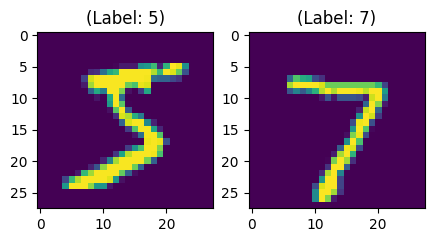

In [201]:
# 데이터 확인을 위한 시각화
plt.figure(figsize=[5,5])  # 그래프 크기 설정

# 훈련 데이터의 첫 번째 이미지 출력
plt.subplot(121)  
curr_img = np.reshape(x_train[0], (28, 28, 1))  
plt.imshow(curr_img)  # 이미지를 표시
print(plt.title("(Label: " + str(label_dict[y_train[0]]) + ")"))  # 레이블 출력

# 테스트 데이터의 첫 번째 이미지 출력
plt.subplot(122)  
curr_img = np.reshape(x_test[0], (28, 28, 1))  
plt.imshow(curr_img)  # 이미지를 표시
print(plt.title("(Label: " + str(label_dict[y_test[0]]) + ")"))  # 레이블 출력

### **데이터 Scaling**

In [202]:
#pca를 위한 scaling
np.min(x_train),np.max(x_train)


(0.0, 1.0)

In [203]:
#784개의 픽셀
x_train_flat = x_train.reshape(-1,784)
x_test_flat = x_test.reshape(-1,784)

In [204]:
# 데이터프레임 생성
# 특징 이름 생성 (픽셀 값에 대해 열 이름 설정)
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]  # x_train_flat의 열 수만큼 'pixel0', 'pixel1', ... 형식의 이름 생성

# MNIST 데이터를 DataFrame으로 변환
df_mnist = pd.DataFrame(x_train_flat, columns=feat_cols)  # x_train_flat 데이터를 열 이름과 함께 DataFrame으로 변환
df_mnist['label'] = y_train  # 레이블 데이터를 DataFrame의 새로운 열로 추가

# DataFrame 크기 출력
print('Size of the dataframe: {}'.format(df_mnist.shape))  # DataFrame의 크기 (행, 열) 출력

Size of the dataframe: (60000, 785)


In [205]:
df_mnist.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


### **PCA 적용**

In [206]:
pca_mnist = PCA(n_components=2)
principalComponents_mnist = pca_mnist.fit_transform(df_mnist.iloc[:,:-1])

In [207]:
# 데이터 프레임 생성
principal_mnist_Df = pd.DataFrame(data = principalComponents_mnist
             , columns = ['principal component 1', 'principal component 2'])
principal_mnist_Df['y'] = y_train

principal_mnist_Df.head()

,principal component 1,principal component 2,y
0,0.486010,1.226174,5
1,3.967523,1.156302,0
2,-0.203332,-1.537934,4
3,-3.133832,2.381166,1
4,-1.501000,-2.864874,9


<Axes: xlabel='principal component 1', ylabel='principal component 2'>

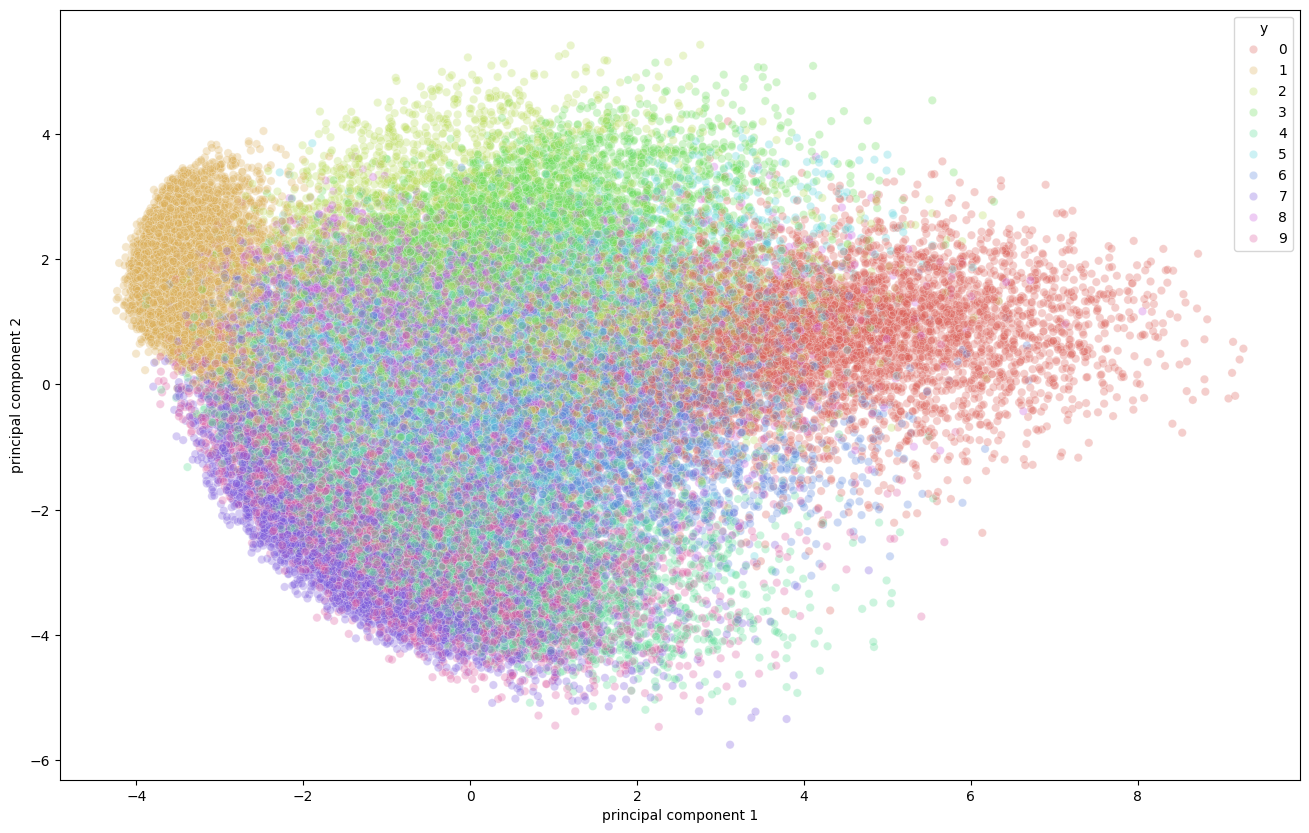

In [208]:
# 시각화
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_mnist_Df,
    legend="full",
    alpha=0.3
)


### **PCA 효과성 검증**

In [209]:
# 데이터 주요 성분 추출
pca = PCA(0.9)

In [210]:
pca.fit(x_train_flat)

PCA(n_components=0.9)

In [211]:
#pca수
pca.n_components_

87

In [212]:
#x_train_flat: 기존 데이터
#train_img_pca: pca 적용 후 데이터
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [213]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 모델 학습

In [214]:
# 학습 파라미터 설정
batch_size = 128
num_classes = 10
epochs = 40

In [215]:
#원본 학습
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(784,)))
model.add(Dropout(0.3))  # Dropout 추가
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))  # Dropout 추가
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_flat, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(x_test_flat, y_test))

Epoch 1/40
469/469 [==============================] - 3s 4ms/step - loss: 0.2987 - accuracy: 0.9056 - val_loss: 0.1242 - val_accuracy: 0.9638
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 0.1226 - accuracy: 0.9643 - val_loss: 0.1085 - val_accuracy: 0.9698
Epoch 3/40
469/469 [==============================] - 1s 3ms/step - loss: 0.0931 - accuracy: 0.9729 - val_loss: 0.0793 - val_accuracy: 0.9786
Epoch 4/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0748 - accuracy: 0.9780 - val_loss: 0.0785 - val_accuracy: 0.9780
Epoch 5/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0611 - accuracy: 0.9821 - val_loss: 0.0713 - val_accuracy: 0.9814
Epoch 6/40
469/469 [==============================] - 2s 4ms/step - loss: 0.0547 - accuracy: 0.9834 - val_loss: 0.0706 - val_accuracy: 0.9838
Epoch 7/40
469/469 [==============================] - 1s 3ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0705 - val_accuracy: 0.9818
Epoch 

In [216]:
#pca 학습
model_pca = Sequential()
model_pca.add(Dense(1024, activation='relu', input_shape=(87,)))
model_pca.add(Dropout(0.5))  # Dropout 추가
model_pca.add(Dense(1024, activation='relu'))
model_pca.add(Dropout(0.5))  # Dropout 추가
model_pca.add(Dense(512, activation='relu'))
model_pca.add(Dense(256, activation='relu'))
model_pca.add(Dense(num_classes, activation='softmax'))

model_pca.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history_pca = model_pca.fit(train_img_pca, y_train,batch_size=batch_size,epochs=epochs,verbose=1,
                    validation_data=(test_img_pca, y_test))

Epoch 1/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3095 - accuracy: 0.9045 - val_loss: 0.1234 - val_accuracy: 0.9608
Epoch 2/40
469/469 [==============================] - 2s 4ms/step - loss: 0.1468 - accuracy: 0.9561 - val_loss: 0.0888 - val_accuracy: 0.9743
Epoch 3/40
469/469 [==============================] - 1s 2ms/step - loss: 0.1178 - accuracy: 0.9654 - val_loss: 0.0741 - val_accuracy: 0.9777
Epoch 4/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0967 - accuracy: 0.9717 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 5/40
469/469 [==============================] - 3s 6ms/step - loss: 0.0835 - accuracy: 0.9755 - val_loss: 0.0706 - val_accuracy: 0.9807
Epoch 6/40
469/469 [==============================] - 2s 5ms/step - loss: 0.0782 - accuracy: 0.9772 - val_loss: 0.0579 - val_accuracy: 0.9829
Epoch 7/40
469/469 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9785 - val_loss: 0.0574 - val_accuracy: 0.9835
Epoch 

## PCA 적용 유무에 따른 성능 비교

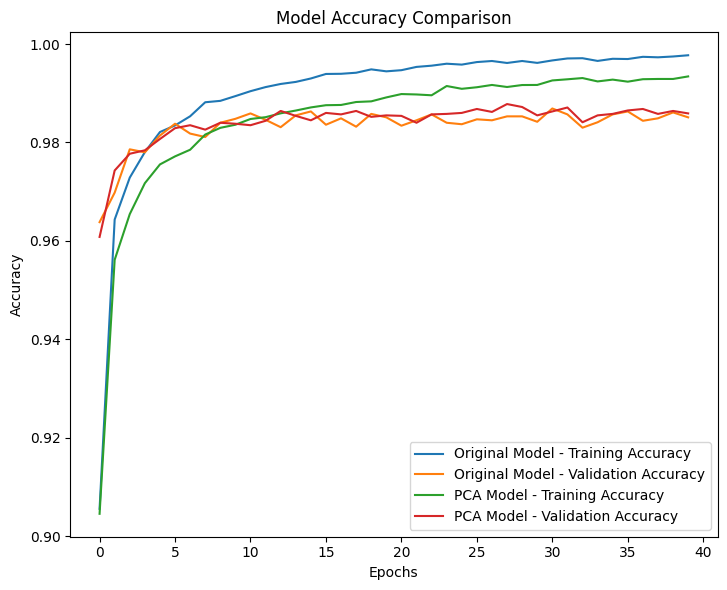

In [217]:
# Plotting the accuracy of the two models
plt.figure(figsize=(14, 6))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Original Model - Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Original Model - Validation Accuracy')
plt.plot(history_pca.history['accuracy'], label='PCA Model - Training Accuracy')
plt.plot(history_pca.history['val_accuracy'], label='PCA Model - Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()